In [1]:
import gym
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback, BaseCallback
from stable_baselines3.common.env_checker import check_env
from env_3 import Consensus_D_F  

# 确保环境符合Gym的规范
env = Consensus_D_F(num_agents=3, num_iterations=10000, dt=0.001)
check_env(env)

# 创建训练环境实例
train_env = Consensus_D_F()

# 创建评估环境实例
eval_env = Consensus_D_F()

# 定义DQN模型
model = DQN(
    "MlpPolicy",    # 使用多层感知器的策略网络
    train_env,      # 自定义环境
    verbose=1,      # 输出训练信息
    learning_rate=1e-4,  # 学习率，可以根据需要调整
    buffer_size=50000,  # 经验回放缓冲区大小
    learning_starts=5000,  # 开始训练前的初始步骤数
    batch_size=32,  # 训练批量大小
    tau=0.01,  # 目标网络更新系数
    gamma=0.99,  # 折扣因子
    train_freq=4,  # 每4步更新一次
    target_update_interval=500,  # 目标网络更新间隔
    exploration_fraction=0.1,  # 探索率衰减的比例
    exploration_final_eps=0.02,  # 最低探索率
    tensorboard_log="./consensus_d_f_tensorboard_3/"  # 日志存储路径
)

class TriggerCountCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(TriggerCountCallback, self).__init__(verbose)
    
    def _on_step(self):
        # 检查是否是 episode 的最后一步
        if self.locals["dones"][0]:  # 当 episode 结束时
            total_trigger_count = self.training_env.get_attr("total")[0]
            time_to_reach_epsilon = self.training_env.get_attr("time")[0]
            success = self.training_env.get_attr("s")[0]
            
            # 记录到 TensorBoard
            self.logger.record("custom/total_trigger_count", total_trigger_count)
            self.logger.record("custom/success", success)
            if time_to_reach_epsilon is not None:
                self.logger.record("custom/time_to_reach_epsilon", time_to_reach_epsilon)
        return True

# 创建评估回调，用于每隔一定步数进行评估，并将最优模型保存在 `best_model` 文件夹中
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./best_model_3_fixed/",
    log_path="./logs/",
    eval_freq=50000,          # 每 10000 步进行一次评估
    n_eval_episodes=50,      # 每次评估进行 20 个 episode
    deterministic=True,
    render=False
)

# 创建自定义的触发计数回调
trigger_count_callback = TriggerCountCallback()

# 开始训练模型，设置训练的时间步数，带有评估和触发计数回调
#model.learn(total_timesteps=3000000, callback=[trigger_count_callback, eval_callback])
model.learn(total_timesteps=3000000, callback=[trigger_count_callback])

# 保存最终训练好的模型
model.save("dqn_consensus_d_f_3agents")

# 如果需要加载并测试模型
# model = DQN.load("dqn_consensus_d_f", env=env)
# obs, _ = env.reset()
# done = False
# while not done:
#     action, _ = model.predict(obs, deterministic=True)
#     obs, reward, done, _, info = env.step(action)

/Users/cyj/anaconda3/envs/py38/lib/python3.8/site-packages/stable_baselines3/common/env_checker.py:271: UserWarning: Your observation  has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./consensus_d_f_tensorboard_3/DQN_6


/Users/cyj/anaconda3/envs/py38/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.total to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.total` for environment variables or `env.get_wrapper_attr('total')` that will search the reminding wrappers.
  logger.warn(
/Users/cyj/anaconda3/envs/py38/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.time to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.time` for environment variables or `env.get_wrapper_attr('time')` that will search the reminding wrappers.
  logger.warn(
/Users/cyj/anaconda3/envs/py38/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.s to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.s` for environment variables or `env.get_wrap

---------------------------------------
| custom/                  |          |
|    success               | 108901   |
|    time_to_reach_epsilon | 1098     |
|    total_trigger_count   | 13471    |
| rollout/                 |          |
|    ep_len_mean           | 1e+04    |
|    ep_rew_mean           | 1.7e+05  |
|    exploration_rate      | 0.869    |
| time/                    |          |
|    episodes              | 4        |
|    fps                   | 4523     |
|    time_elapsed          | 8        |
|    total_timesteps       | 40000    |
| train/                   |          |
|    learning_rate         | 0.0001   |
|    loss                  | 4.52     |
|    n_updates             | 8749     |
---------------------------------------
---------------------------------------
| custom/                  |          |
|    success               | 108560   |
|    time_to_reach_epsilon | 1439     |
|    total_trigger_count   | 11350    |
| rollout/                 |          |


KeyboardInterrupt: 

In [12]:
model.learn(total_timesteps=5000000, callback=[trigger_count_callback])

# 保存最终训练好的模型
model.save("dqn_consensus_d_f_3agents")

Logging to ./consensus_d_f_tensorboard_3/DQN_3
---------------------------------------
| custom/                  |          |
|    success               | 108914   |
|    time_to_reach_epsilon | 1085     |
|    total_trigger_count   | 14403    |
| rollout/                 |          |
|    ep_len_mean           | 1e+04    |
|    ep_rew_mean           | 1.06e+05 |
|    exploration_rate      | 0.961    |
| time/                    |          |
|    episodes              | 4        |
|    fps                   | 5457     |
|    time_elapsed          | 7        |
|    total_timesteps       | 40000    |
| train/                   |          |
|    learning_rate         | 0.0001   |
|    loss                  | 80.4     |
|    n_updates             | 1257499  |
---------------------------------------
---------------------------------------
| custom/                  |          |
|    success               | 108589   |
|    time_to_reach_epsilon | 1410     |
|    total_trigger_count   | 1378

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
随机生成的初始位置: [0.9, -0.2, 1.0]
总共的触发次数: 2235
实现一致性的时间: 9955


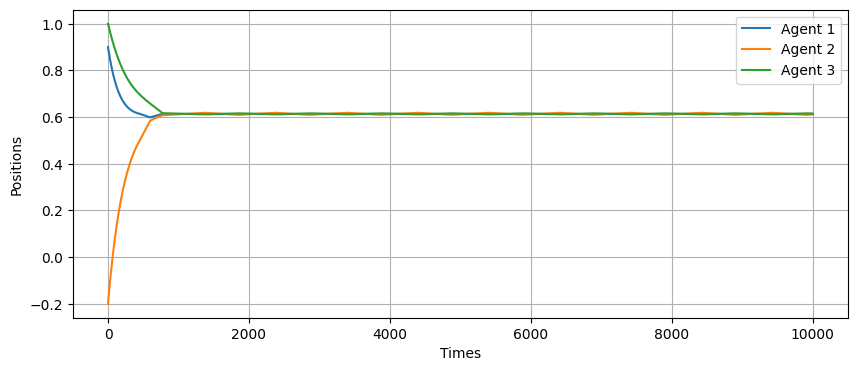

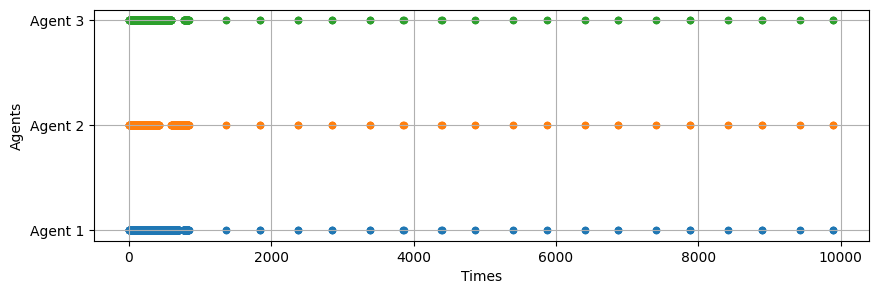

In [14]:
import gym
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback, BaseCallback
from stable_baselines3.common.env_checker import check_env
from env_3 import Consensus_D_F  # 从env3.py导入你的自定义环境

# 确保环境符合Gym的规范
env = Consensus_D_F(num_agents=3, num_iterations=10000, dt=0.001)
check_env(env)


# 加载预训练模型
#model = PPO.load("ppo_consensus_d_f", env=env)
#model = PPO.load("./best_model/best_model.zip", env=env)
env.reset()
#model = DQN.load("dqn_consensus_d_f_3agents", env=env)
model = DQN.load("./best_model_3/best_model.zip", env=env)


# 获取200步的动作矩阵
actions_over_time = env.render(model)
# for action in actions_over_time:
#     print(action)
